##### About This

    Identify the best source of recruitment for a tech startup, based on previous 
    data of candidate sources and recruitment strategies

##### Opportunity, Purpose and Deleiries.
    
       Practo is on a mission to make quality healthcare affordable and accessible for over a billion+ Indians.
       Practo empowers its users with the most accurate, comprehensive, and curated information and care, enabling 
       them to make better healthcare decisions. In this menternship, you will be challenged to help Practo 
       find employees who are looking for a mission, instead of a job.
       
       will identify the best recruiting source for a technology company by conducting exploratory data analysis on Python.

`Importing Required Libraries.`
    
    Pandas (pd)         A powerful library for data manipulation and analysis, providing data structures like DataFrames.
    
    Numpy (np)          A fundamental package for numerical computations in Python, offering support for arrays, 
                            matrices, and mathematical functions.
    
    Seaborn (sns)       A statistical data visualization library built on top of matplotlib, providing a high-level 
                            interface for drawing attractive and informative statistical graphics.
    
    Matplotlib (plt)    A comprehensive library for creating static, animated, and interactive plots and visualizations.

In [1]:
# USe to Work on DataFrame
import pandas as pd
import numpy as np

# Make a Visualizations according to the requirement.
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py

# Importing Warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Recruitment_Data_updated.csv')
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,0.000707,2.976686,0.604739,Applied Online
1,-0.019452,2.989157,0.396567,NaN
2,-0.009998,2.993355,0.206242,Applied Online
3,-0.003004,1.989966,-0.475037,NaN
4,-0.025405,3.016559,0.345470,Campus


In [3]:
df.shape

(107354, 4)

In [4]:
df.describe()

,attrition,performance_rating,sales_quota_pct
count,107354.000000,107354.000000,107354.000000
mean,0.213198,2.895066,1.082606
std,0.409639,0.682871,0.710279
min,-0.042386,0.964432,-0.739909
25%,-0.004684,2.022333,0.589342
50%,0.003484,2.998005,1.069800
75%,0.016809,3.010101,1.532299
max,1.038685,5.027383,3.701694


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107354 entries, 0 to 107353
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   attrition           107354 non-null  float64
 1   performance_rating  107354 non-null  float64
 2   sales_quota_pct     107354 non-null  float64
 3   recruiting_source   57753 non-null   object 
dtypes: float64(3), object(1)
memory usage: 3.3+ MB


In [6]:
count = df.isnull().sum()
percen = df.isnull().sum() / len(df) * 100

df_null = pd.DataFrame({
    'column name' : df.columns,
    'total count' : count,
    'percentage' : percen
})

df_null.reset_index(drop = True, inplace = True)
df_null_sorted = df_null.sort_values(by='percentage', ascending = False)
df_null_sorted

,column name,total count,percentage
3,recruiting_source,49601,46.203216
0,attrition,0,0.000000
1,performance_rating,0,0.000000
2,sales_quota_pct,0,0.000000


    Null Pointer
    
        This seems that there is only null values in the Recruiting Source and here the amount is more than 40% 
        so need to solve it as per our visualization and to check the pattern as this may be the one of 
        the important feature.

In [7]:
df['recruiting_source'].unique()

array(['Applied Online', nan, 'Campus', 'Referral', 'Search Firm'],
      dtype=object)

In [8]:
df['recruiting_source'].value_counts()

recruiting_source
Applied Online    30966
Campus            13453
Referral          10926
Search Firm        2408
Name: count, dtype: int64

    As there are some values which says that :
        
        Applied Online    30966
        Campus            13453
        Referral          10926
        Search Firm        2408
    
    As there is more than 40% NULL values so lets check that more to solve it is other features are is connected to it.

In [9]:
df['sales_quota_pct'].value_counts()

sales_quota_pct
 0.604739    1
 0.298875    1
-0.143928    1
 1.257064    1
 1.696407    1
            ..
 1.554239    1
 1.318110    1
 1.511340    1
 1.767964    1
 2.896500    1
Name: count, Length: 107354, dtype: int64

    This may won't be so much important to get it. As this is most unique Value.

In [10]:
df['performance_rating'].value_counts()

performance_rating
3.000000    263
2.000000    106
4.000000     67
1.000000      7
5.000000      3
           ... 
2.988846      1
3.006625      1
3.019291      1
1.985913      1
1.988047      1
Name: count, Length: 106913, dtype: int64

    This can be most to compare with Recruiting Sorce.

In [11]:
df['performance_rating'] = df['performance_rating'].round()
df['performance_rating'].value_counts()

performance_rating
3.0    63337
2.0    25431
4.0    16182
1.0     1707
5.0      697
Name: count, dtype: int64

In [12]:
df['attrition'].value_counts()

attrition
 0.000000    351
 1.000000     95
-0.000092      4
-0.000091      3
-0.000059      3
            ... 
-0.008366      1
 0.013047      1
 0.002012      1
 0.002532      1
-0.009020      1
Name: count, Length: 106758, dtype: int64

In [13]:
df['attrition'] = df['attrition'].round()
df['attrition'].value_counts()

attrition
0.0    84465
1.0    22889
Name: count, dtype: int64

    As this is out target column and we had to find how its impacting the recruiting source so can't fulfil it
    As the data 1 and 0 denotes what but this can be checked

    As all above Features aren't so much related to each other so i think this recruitment is done by
    some other source so am deciding to fill this by Other Sources.

In [14]:
df['recruiting_source'] = df['recruiting_source'].fillna('other_source')

##### EDA ( Exploratory Data Analysis )

    As the Cleaning Process is done and now we have to work on Visualization patterns to get better insights how
    there is attrition in the Domain.

In [15]:
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,0.0,3.0,0.604739,Applied Online
1,-0.0,3.0,0.396567,other_source
2,-0.0,3.0,0.206242,Applied Online
3,-0.0,2.0,-0.475037,other_source
4,-0.0,3.0,0.345470,Campus


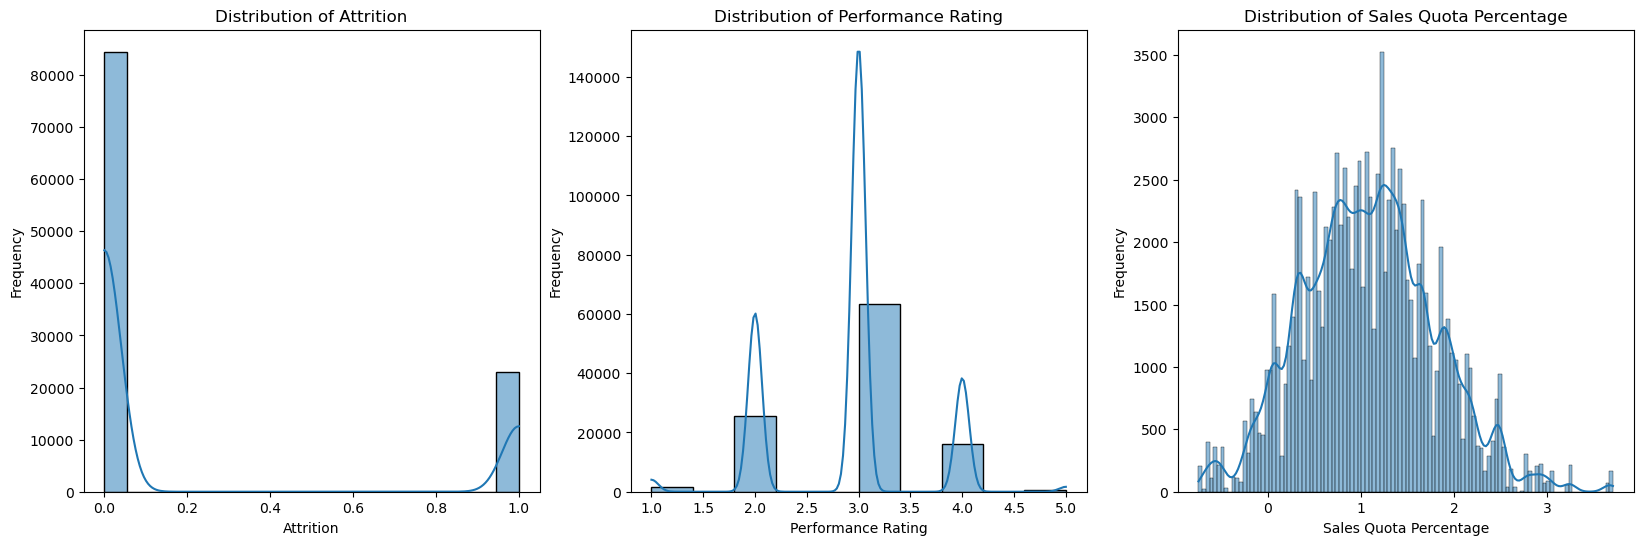

In [16]:
plt.figure(figsize = [20, 6])
plt.subplot(1, 3, 1)
sns.histplot(df['attrition'], kde=True)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['performance_rating'], kde=True, bins=10)
plt.title('Distribution of Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['sales_quota_pct'], kde=True)
plt.title('Distribution of Sales Quota Percentage')
plt.xlabel('Sales Quota Percentage')
plt.ylabel('Frequency')
plt.show()

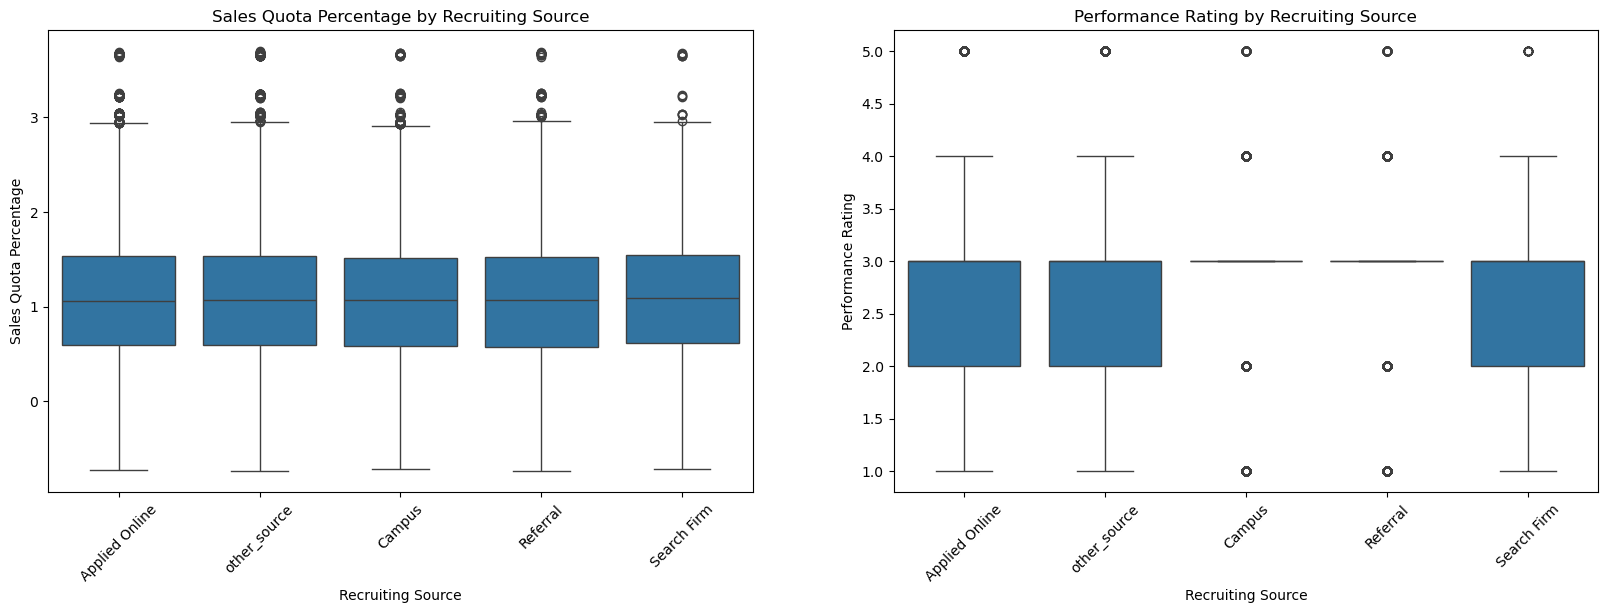

In [17]:
plt.figure(figsize = [20, 6])
plt.subplot(1, 2, 1)
sns.boxplot(x='recruiting_source', y='sales_quota_pct', data=df)
plt.title('Sales Quota Percentage by Recruiting Source')
plt.xlabel('Recruiting Source')
plt.ylabel('Sales Quota Percentage')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='recruiting_source', y='performance_rating', data=df)
plt.title('Performance Rating by Recruiting Source')
plt.xlabel('Recruiting Source')
plt.ylabel('Performance Rating')
plt.xticks(rotation=45)
plt.show()

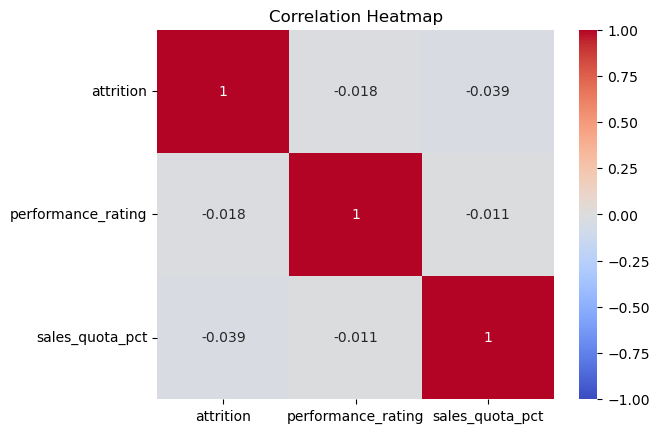

In [18]:
corr = df[['attrition', 'performance_rating', 'sales_quota_pct']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

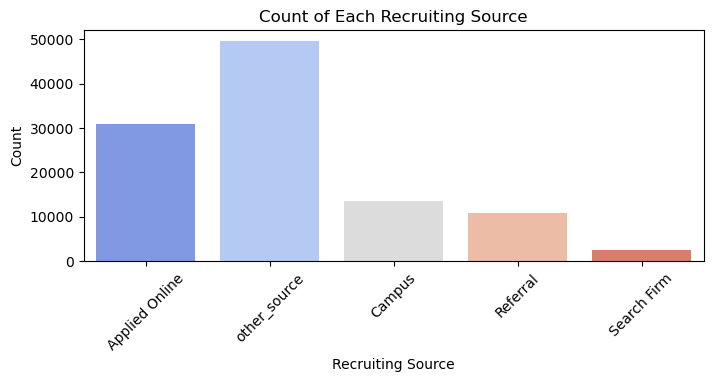

In [19]:
plt.figure(figsize = [8, 3])
sns.countplot(x='recruiting_source', data=df,palette = 'coolwarm')
plt.title('Count of Each Recruiting Source')
plt.xlabel('Recruiting Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

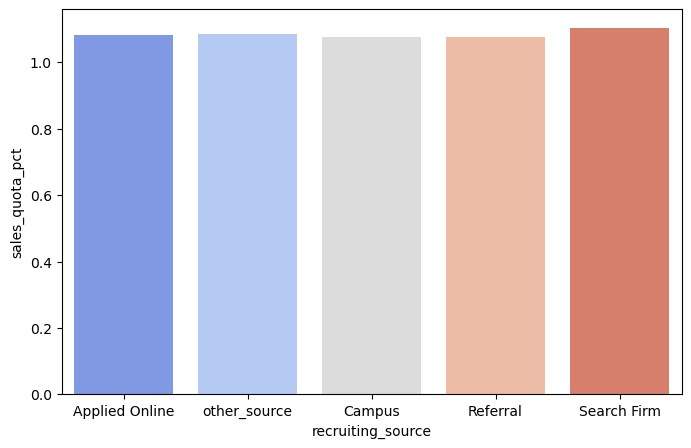

In [20]:
# Printing the graph of Sales Number grouped by Recruiting Source

plt.figure(figsize = [8, 5])
sns.barplot(data = df, x = 'recruiting_source', y = 'sales_quota_pct',ci = None , palette = 'coolwarm')
plt.show()

In [21]:
#Printing the average Attrition Number grouped by Recruiting Source

avg_attrition_number = df.groupby("recruiting_source")["attrition"].mean()
avg_attrition_number

recruiting_source
Applied Online    0.213395
Campus            0.215194
Referral          0.214992
Search Firm       0.208056
other_source      0.212415
Name: attrition, dtype: float64

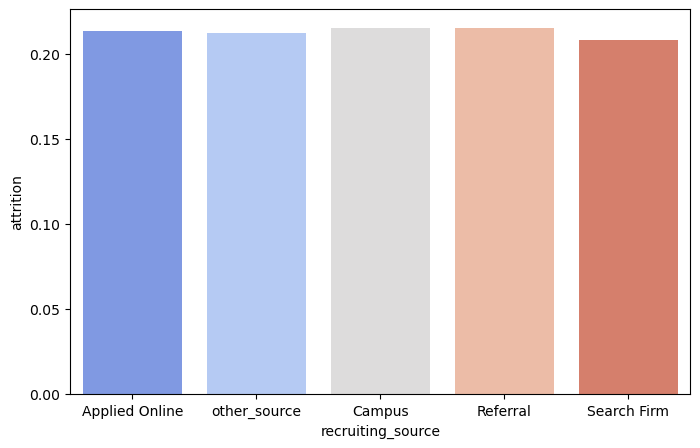

In [22]:
# Printing the graph of Attrition Number grouped by Recruiting Source
plt.figure(figsize = [8, 5])

sns.barplot(data=df, x='recruiting_source', y='attrition',ci=None, palette='coolwarm')
plt.show()

In [23]:
print(df.groupby(["recruiting_source"]).sum())

                   attrition  performance_rating  sales_quota_pct
recruiting_source                                                
Applied Online        6608.0             89532.0     33472.966366
Campus                2895.0             38924.0     14480.912208
Referral              2349.0             31756.0     11751.333079
Search Firm            501.0              6977.0      2657.050892
other_source         10536.0            143604.0     53859.851408


In [ ]:
plt.figure(figsize = [10, 10])
sns.pairplot(df, hue = 'attrition', palette = 'plasma')
plt.show()

### Insights of HR Analyitcs data:
    
    Attrition Info :
        In the HR Analytics dataframe, the attrition column has the highest value as '0' and the lowest as '1'. 
        This suggests that the majority of employees remain with the company, with few resigning
            
    Performantion Rating Info :
        Employees hired through 'Applied Online' generally have higher performance ratings compared to others, 
        though differences are minimal and require statistical testing.
    
    Sales Quota Info :
        The comparison between recruiting_source and sales_quota_pct reveals that the 'Applied Online' source has 
        the highest sales quota percentage, outperforming other recruiting sources in the dataset.
        
    Recruiting Souce Information : 
        The recruiting_source column indicates that the highest number of employees were recruited 
        through the "Applied Online" source, while the "Search Firm" source has the fewest employees,
        highlighting significant variations in recruitment channels

### Overall Conclusion :

    In terms of sales performance, Applied Online, Campus and Search Firm is the top recruiting source, closely followed by Referral. The sales figures for Applied Onl are much lower.

    Campus and Referral are the two best recruitment sources in terms of attrition rate. Applied Online and Search Firm are the sources with the highest attrition rates.

    Only considering sales results or attrition rates should not be used to evaluate the quality of a recruiting source. When deciding on the best recruiting source, a balance between the two elements should be taken into account.

    According to the visualizations and research presented above, Applied Online and Campus appears to be the most effective recruiting source because of its strong sales results and low attrition rate. However, more research is necessary to consider additional elements like recruitment expenses, the length of time it takes to fill positions, and the diversity of candidates.

`Which of the recruiting sources in this dataset produced the best hires, measured by attrition and sales? Which source produced the worst hires?`

`Best source in HR Analytics: Applied Online, Worst source in HR Analytics: Search Firm`

# By Vikas Kumar Ram